In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1

In [115]:
data = pd.read_excel('train.xlsx')

In [116]:
data.head(5)

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [90]:
years = data['Order Date'].dt.year.unique()

# Сортируем года для удобства и выводим их
sorted_years = sorted(years)
print(sorted_years)

[2015, 2016, 2017, 2018]
2016


In [94]:
# Фильтруем данные за последние 2 года
last_2year = sorted_years[-2]
recent_data_2yr = data[data['Order Date'].dt.year >= last_2year]
sub_category_counts = recent_data_2yr['Sub-Category'].value_counts()
result_2yr = sub_category_counts.head(4)
print(result_2yr)

Binders        900
Paper          809
Furnishings    557
Phones         510
Name: Sub-Category, dtype: int64


In [95]:
# Фильтруем данные за последний год

last_year = sorted_years[-1]
recent_data_1yr = data[data['Order Date'].dt.year >= last_year]
sub_category_counts = recent_data_1yr['Sub-Category'].value_counts()
result_1yr = sub_category_counts.head(4)
print(result_1yr)

Binders        492
Paper          452
Furnishings    310
Phones         290
Name: Sub-Category, dtype: int64


In [96]:
result_all_time = data['Sub-Category'].value_counts().head(4)

print(result_all_time)

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: Sub-Category, dtype: int64


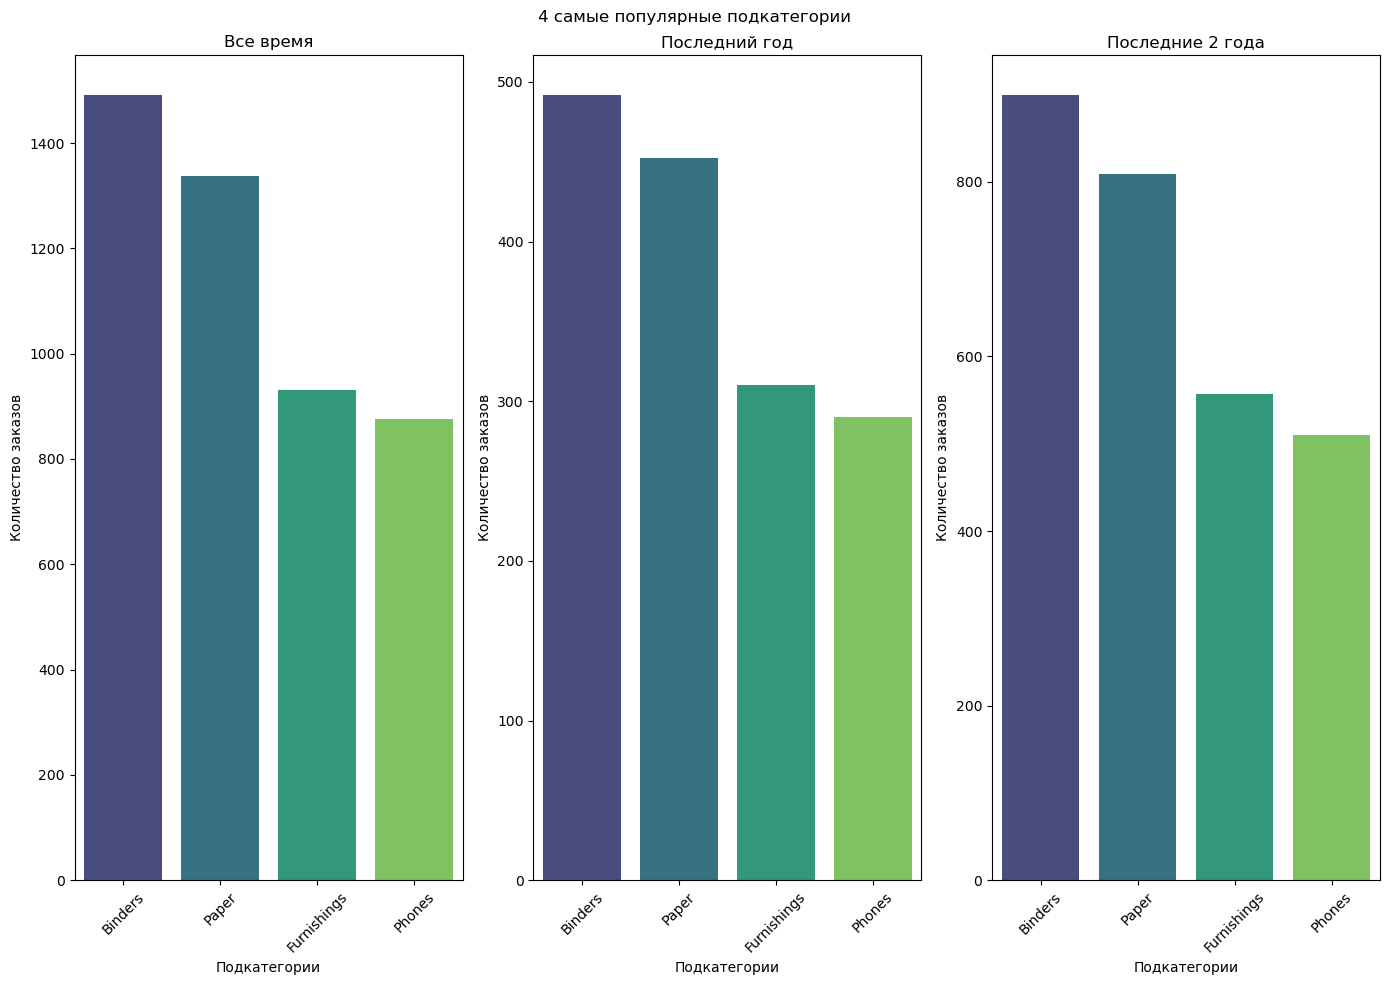

In [101]:
plt.figure(figsize=(14, 10))
plt.suptitle('4 самые популярные подкатегории')

# 1. Все время
plt.subplot(1, 3, 1)
sns.barplot(x=result_all_time.index, 
            y=result_all_time.values, 
            palette='viridis')
plt.title('Все время')
plt.xlabel('Подкатегории')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# 2. Последний год
plt.subplot(1, 3, 2)
sns.barplot(x=result_1yr.index, 
            y=result_1yr.values, 
            palette='viridis')
plt.title('Последний год')
plt.xlabel('Подкатегории')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# 3. Последние 2 года
plt.subplot(1, 3, 3)
sns.barplot(x=result_2yr.index, 
            y=result_2yr.values, 
            palette='viridis')
plt.title('Последние 2 года')
plt.xlabel('Подкатегории')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

plt.tight_layout()  # Убирает наложение графиков
plt.show()

За все просмотренные периоды самые популярные категории не менялись и были соответственно Binders, Paper, Furnishings, Phones. Так же соотношения между данными категориями оставались примерно похожими. 

## Задание 2

In [103]:
data['Sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

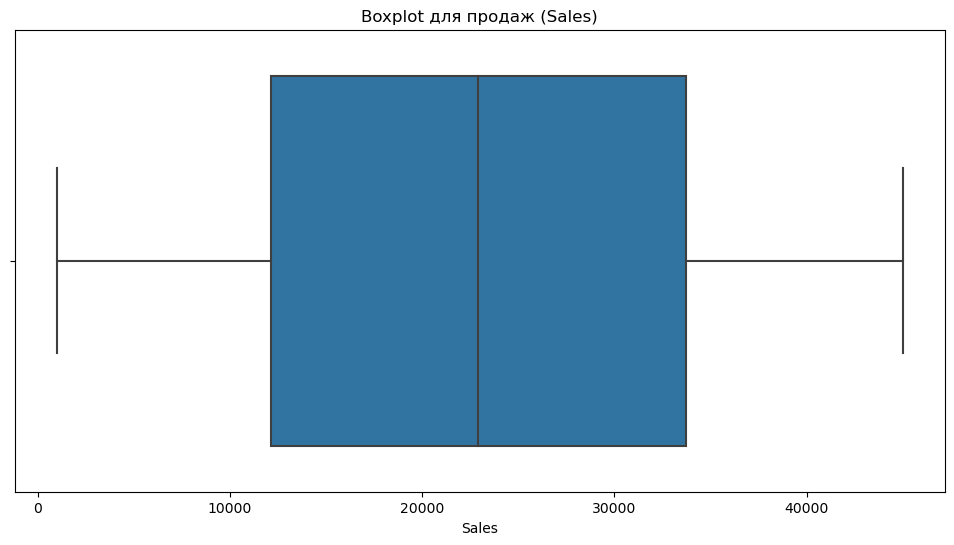

12601.999815243926
22921.75773653065


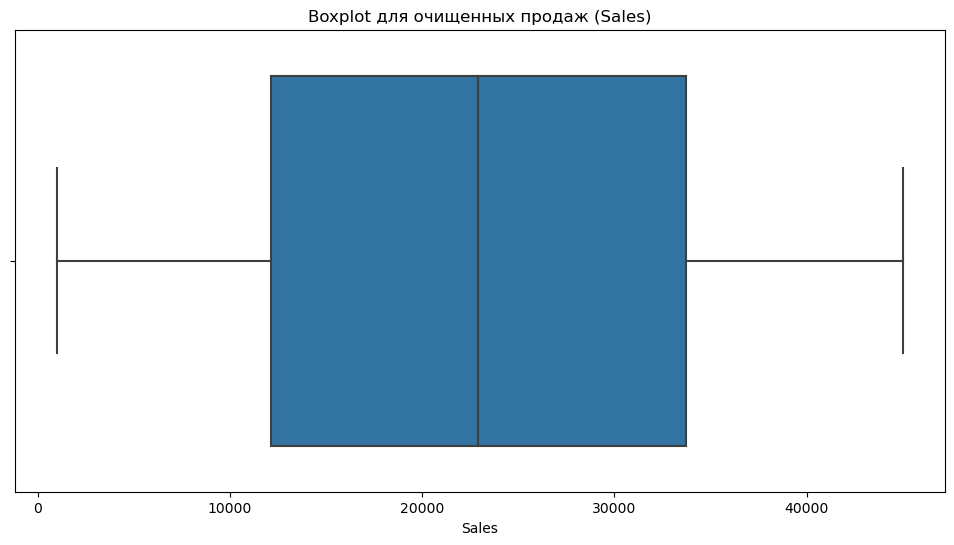

In [73]:
# Построение первоначального boxplot для визуализации распределения значений
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Sales'])
plt.title('Boxplot для продаж (Sales)')
plt.xlabel('Sales')
plt.show()

# 1. Вычисление среднего и стандартного отклонения для Sales
mean_sales = data['Sales'].mean()
std_sales = data['Sales'].std()

# 2. Применение правила трех сигм для определения границ
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

# 3. Удаление аномалий (значений, выходящих за пределы трех сигм)
filtered_data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

print(std_sales)
print(mean_sales)
print(max(filtered_data))

# 4. Построение boxplot для очищенных данных
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_data['Sales'])
plt.title('Boxplot для очищенных продаж (Sales)')
plt.xlabel('Sales')
plt.show()

/Users/olga/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Количество выбросов: 490
Количество нормальных данных: 9310


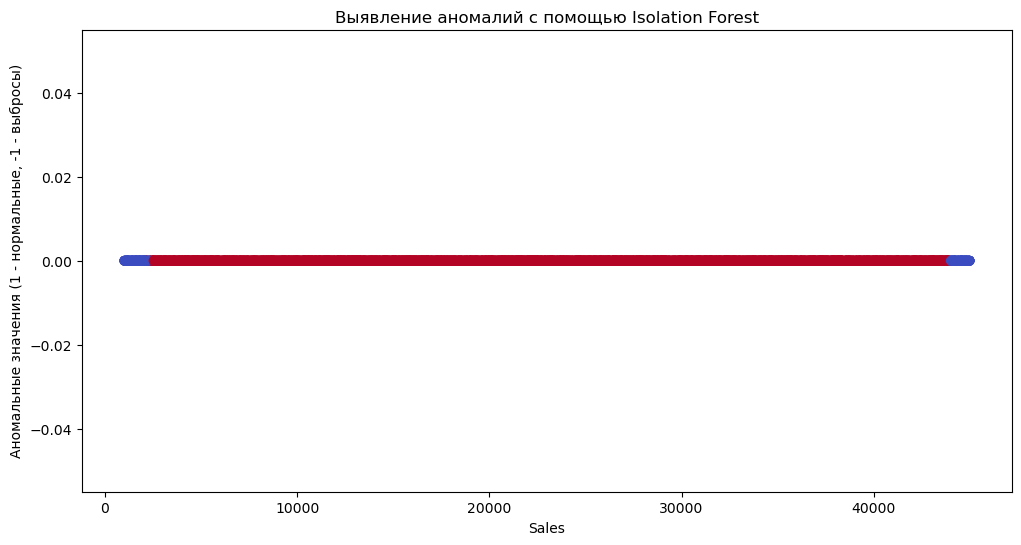

In [105]:
from sklearn.ensemble import IsolationForest

# Обучение Isolation Forest
model = IsolationForest(contamination=0.05)
data['anomaly'] = model.fit_predict(data[['Sales']])

# Выбросы будут помечены как -1, нормальные значения как 1
outliers = data[data['anomaly'] == -1]
normal_data = data[data['anomaly'] == 1]

# Проверка количества выбросов
print(f'Количество выбросов: {len(outliers)}')
print(f'Количество нормальных данных: {len(normal_data)}')

# (Необязательно) Визуализируйте результаты с помощью scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(data['Sales'], [0]*len(data), c=data['anomaly'], cmap='coolwarm', marker='o')
plt.title('Выявление аномалий с помощью Isolation Forest')
plt.xlabel('Sales')
plt.ylabel('Аномальные значения (1 - нормальные, -1 - выбросы)')
plt.show()

In [81]:
# Вычисляем Q1, Q3 и IQR
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выводим границы
print(f'Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}')

# Отфильтровываем данные
filtered_data_iqr = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

# Проверяем длину данных
print(f'Количество исходных записей: {len(data)}')
print(f'Количество очищенных записей: {len(filtered_data_iqr)}')

Нижняя граница: -20256.132499999996, Верхняя граница: 66121.8875
Количество исходных записей: 9800
Количество очищенных записей: 9800


Данные достаточно однородные, выбросов нет. Можно удалить крайние значения с помощью IsolationForest, но для данной задачи это избыточное решение. 

# Задание 3

In [129]:
# Определение групп продаж
def categorize_sales(sales):
    if sales < 12135.63:
        return 'Маленькие продажи'
    elif sales < 33730.13:
        return 'Средние продажи'
    else:
        return 'Высокие продажи'

data['Sale_group'] = data['Sales'].apply(categorize_sales)

In [130]:
# Группировка данных по Region и Sale_group
grouped_data = data.groupby(['Region', 'Sale_group']).agg(
    Total_Sales=('Sales', 'sum'),  # Сумма продаж
    Count_Orders=('ID', 'count')    # Количество заказов
).reset_index()

# Определение наиболее прибыльной группы
most_profitable_group = grouped_data.loc[grouped_data['Total_Sales'].idxmax()]

# Определение наименее прибыльной группы
least_profitable_group = grouped_data.loc[grouped_data['Total_Sales'].idxmin()]

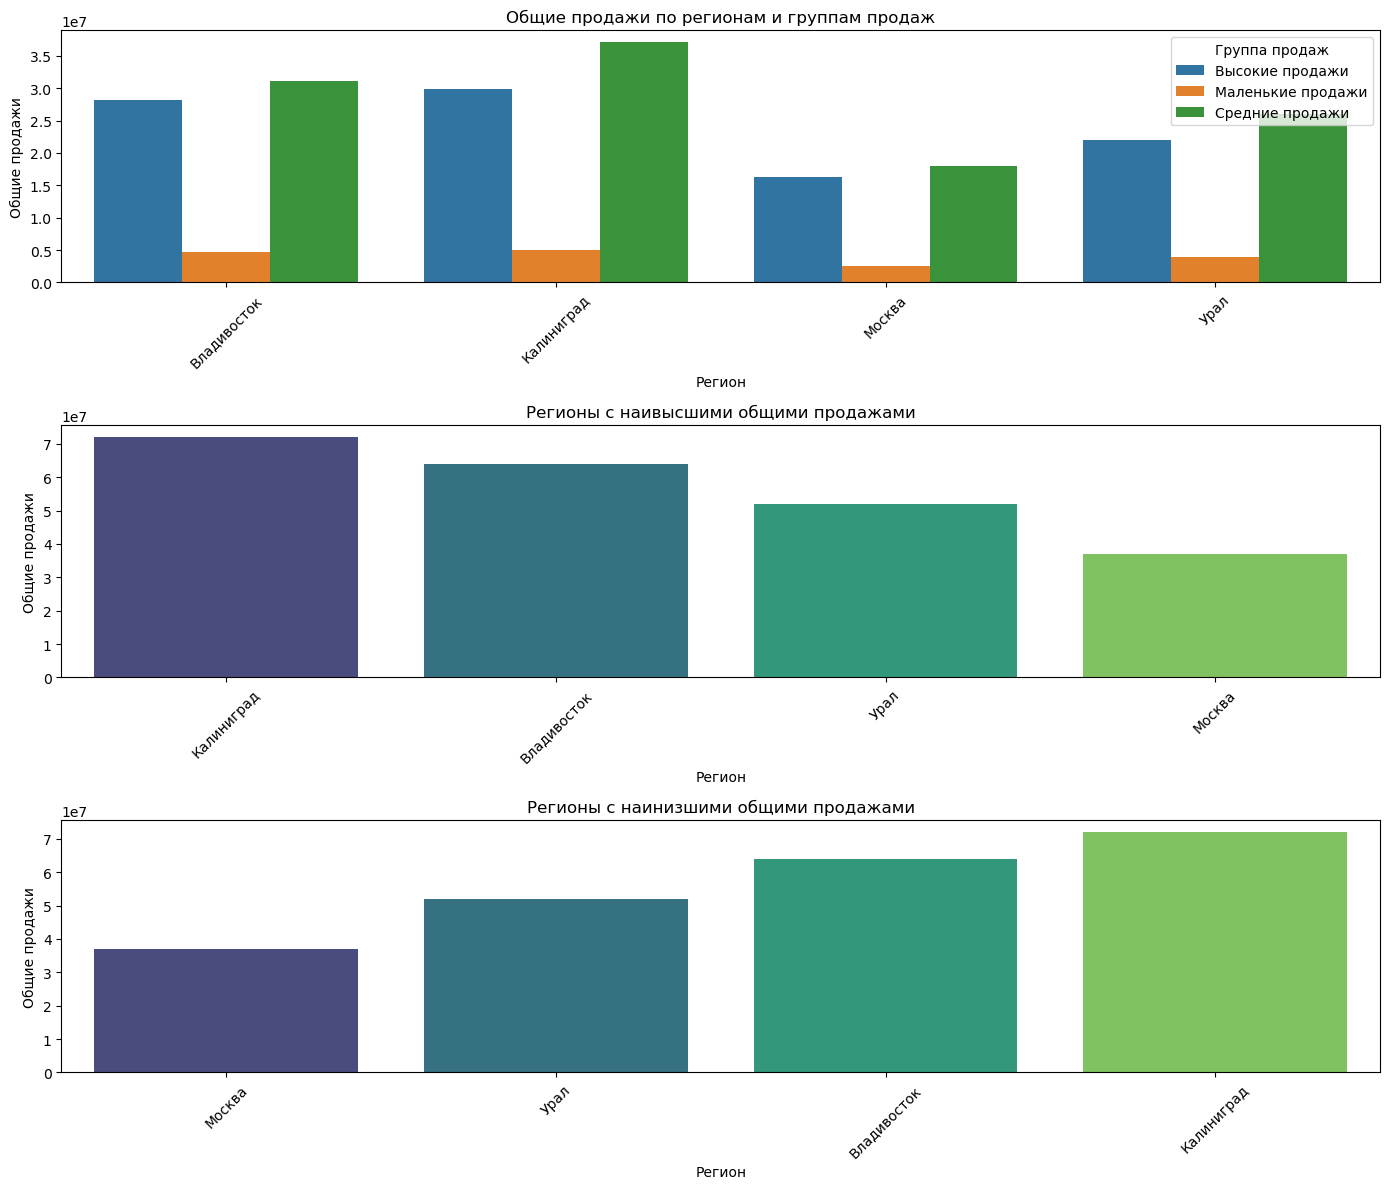


Наиболее прибыльная группа:
Region               Калиниград
Sale_group      Средние продажи
Total_Sales         37049906.36
Count_Orders               1621
Name: 5, dtype: object

Наименее прибыльная группа:
Region                     Москва
Sale_group      Маленькие продажи
Total_Sales           2528321.864
Count_Orders                  392
Name: 7, dtype: object


In [133]:
# Создаем график
plt.figure(figsize=(14, 12))

# Основной график с общими продажами
plt.subplot(3, 1, 1)
sns.barplot(x='Region', y='Total_Sales', hue='Sale_group', data=grouped_data)
plt.title('Общие продажи по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Общие продажи')
plt.legend(title='Группа продаж')
plt.xticks(rotation=45)

# График с наивысшими продажами
plt.subplot(3, 1, 2)
highest_sales = grouped_data.groupby('Region')['Total_Sales'].sum().reset_index()
highest_sales = highest_sales.sort_values(by='Total_Sales', ascending=False).head(5)
sns.barplot(x='Region', y='Total_Sales', data=highest_sales, palette='viridis')
plt.title('Регионы с наивысшими общими продажами')
plt.xlabel('Регион')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)

# График с наинизшими продажами
plt.subplot(3, 1, 3)
lowest_sales = grouped_data.groupby('Region')['Total_Sales'].sum().reset_index()
lowest_sales = lowest_sales.sort_values(by='Total_Sales', ascending=True).head(5)
sns.barplot(x='Region', y='Total_Sales', data=lowest_sales, palette='viridis')
plt.title('Регионы с наинизшими общими продажами')
plt.xlabel('Регион')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Вывод информации о наиболее прибыльной группе
print("\nНаиболее прибыльная группа:")
print(most_profitable_group)

print("\nНаименее прибыльная группа:")
print(least_profitable_group)

In [ ]:
Наиболее прибыльная група продаж - в Калининграде, наименее - в Москве